In [5]:
# from google.colab import drive
# drive.mount('/content/drive')
# % cd '/content/drive/My Drive/__Kadambi/'

dir_data = '../WeatherNet/dataset/'

import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

In [10]:
n=2
img_orig_rainy = cv2.imread(f"images/rainy/{n}_cropped.jpg")
img_orig_clean = cv2.imread(f"images/clean/{n}_cropped.jpg")
img_MPRNet = cv2.imread(f"images/output/MPRNet/{n}_cropped.png")
img_MSPFN = cv2.imread(f"images/output/MSPFN/{n}_cropped.jpg")
img_RCDNet = cv2.imread(f"images/output/RCDNet/{n}_cropped_x2_SR.png")

(1060, 1437, 3)
(1060, 1437, 3)
(1060, 1437, 3)
(1060, 1436, 3)
(1060, 1437, 3)


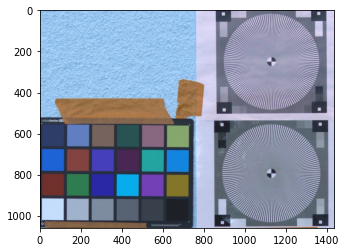

In [11]:
print(f"{img_orig_clean.shape}\n{img_orig_rainy.shape}\n{img_MPRNet.shape}\n{img_MSPFN.shape}\n{img_RCDNet.shape}")
plt.imshow(img_orig_clean)

In [12]:
psnr_gt = cv2.PSNR(img_orig_clean, img_orig_clean)
psnr_base = cv2.PSNR(img_orig_clean, img_orig_rainy)
psnr_MPRNet = cv2.PSNR(img_orig_clean, img_MPRNet)
psnr_MSPFN = cv2.PSNR(img_orig_clean[:, :-1, :], img_MSPFN)
psnr_RCDNet = cv2.PSNR(img_orig_clean, img_RCDNet)

ssim_gt = ssim(img_orig_clean, img_orig_clean, multichannel=True)
ssim_base = ssim(img_orig_clean, img_orig_rainy, multichannel=True)
ssim_MPRNet = ssim(img_orig_clean, img_MPRNet, multichannel=True)
ssim_MSPFN = ssim(img_orig_clean[:, :-1, :], img_MSPFN, multichannel=True)
ssim_RCDNet = ssim(img_orig_clean, img_RCDNet, multichannel=True)

In [13]:
print(f"              PSNR / SSIM")
print(f"GT - GT:     {psnr_gt:.2f} / {ssim_gt:.2f}")
print(f"GT - rainy:  {psnr_base:.2f} / {ssim_base:.2f}")
print(f"GT - MPRNet: {psnr_MPRNet:.2f} / {ssim_MPRNet:.2f}")
print(f"GT - MSPFN : {psnr_MSPFN:.2f} / {ssim_MSPFN:.2f}")
print(f"GT - RCDNet: {psnr_RCDNet:.2f} / {ssim_RCDNet:.2f}")

              PSNR / SSIM
GT - GT:     361.20 / 1.00
GT - rainy:  26.49 / 0.88
GT - MPRNet: 26.66 / 0.88
GT - MSPFN : 28.07 / 0.89
GT - RCDNet: 26.40 / 0.88
